<a href="https://colab.research.google.com/github/kenclements/praxis/blob/main/Supervised-TWOS-0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import string
import re

#Vectorization and Tokenizing
from tensorflow.keras import layers

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MaxAbsScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
import torch
from tensorflow.keras import losses
from tensorflow.keras.regularizers import L2
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import TextVectorization

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

#Models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression


#Metrics and Testing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Praxis/data/TWOS/email_ano/combined.csv')
#df = pd.read_csv('/Data/TWOS-dataset/email_ano/combined.csv')
#df = pd.read_csv('/Data/TWOS-dataset/email_ano/IMDB Dataset.csv')
#df = pd.read_csv('/content/drive/MyDrive/Praxis/data/IMDB Dataset.csv')



In [5]:
#keep in case combined is not good.
#df = pd.concat([file1, file2, file3, file4, file6, file7, file8, file9, file10, file11, file12, file13, file14, file15, file16, file17, file18, file19, file20, file21, file22, file23])

In [6]:
#keep to test other datasets
#df.rename(columns={"review": "body_anon", "sentiment": "label"}, inplace=True)

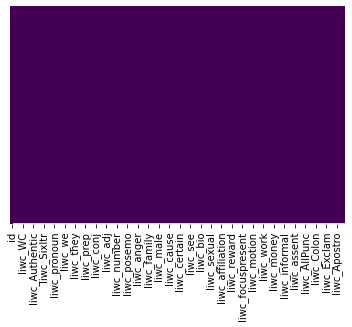

In [7]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.dropna(subset=['label'], inplace=True)


In [9]:
df['label'] = df['label'].map({'ANOMALY': 1, 'NORMAL': 0})

In [10]:
def prep(dfx):
    dfx1 = [re.sub(r'[^\w\s]','', x) for x in dfx]
    dfx1 = ''.join(dfx1)
    return(dfx1)

df['body_anon'] = df['body_anon'].apply(prep)

In [11]:
#nltk.download('stopwords') #not using this yet...
#stops = set(stopwords.words('english'))
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
def prepare_text(pretext):

    # tokenize mission.
    tokens = word_tokenize(pretext, language="english", preserve_line=True)

    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = (tok for tok, tag in token_tag if tag in include_tags)    
    #stem words.
    stemmed_tokens = (lancaster.stem(tok) for tok in filtered_tokens)

    #lemm words.
    lemmed_words = (lemmatizer.lemmatize(tok) for tok in stemmed_tokens)

    lower_words = [str.lower(tok) for tok in lemmed_words]

    #x = cv.fit_transform(tokens).toarray()

    joined = " ".join(lower_words);

    return(joined)

#ps = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()
    
df['tokenized'] = df['body_anon'].apply(prepare_text)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [12]:
df.head(1)


,id,label,body_anon,liwc_WC,liwc_Analytic,liwc_Clout,liwc_Authentic,liwc_Tone,liwc_WPS,liwc_Sixltr,...,liwc_Colon,liwc_SemiC,liwc_QMark,liwc_Exclam,liwc_Dash,liwc_Quote,liwc_Apostro,liwc_Parenth,liwc_OtherP,tokenized
0,758,0,Hey Yeah I think we could do that I did a test...,43.0,48.77,91.85,87.51,25.77,8.6,13.95,...,0.0,0.0,4.65,2.33,0.0,0.0,4.65,0.0,0.0,hey did test first custom first 4gaa3hguvn let...


In [13]:
#countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(stop_words=None, analyzer='word' )

In [14]:
# count_wm = countvectorizer.fit_transform(df['body_anon'])
tfidf_wm = tfidfvectorizer.fit_transform(df['tokenized'])


In [15]:
#count_tokens = countvectorizer.get_feature_names_out()
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

In [16]:
# df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
# print("Count Vectorizer\n")
# print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)


TD-IDF Vectorizer

      0ibjzkpxq2  0jyhzuztex  0kg4y0ixy0  0m0ywnsd4o  0m5mcj3z2x  0pmpn6i2et  \
0            0.0         0.0         0.0         0.0         0.0         0.0   
1            0.0         0.0         0.0         0.0         0.0         0.0   
2            0.0         0.0         0.0         0.0         0.0         0.0   
3            0.0         0.0         0.0         0.0         0.0         0.0   
4            0.0         0.0         0.0         0.0         0.0         0.0   
...          ...         ...         ...         ...         ...         ...   
1970         0.0         0.0         0.0         0.0         0.0         0.0   
1971         0.0         0.0         0.0         0.0         0.0         0.0   
1972         0.0         0.0         0.0         0.0         0.0         0.0   
1973         0.0         0.0         0.0         0.0         0.0         0.0   
1974         0.0         0.0         0.0         0.0         0.0         0.0   

      0pmpn6i2et8rz

In [17]:
print(df.loc[50, 'tokenized'])

hah account saf im last min scor school wif l57dr9bhkh


In [18]:

print(tfidf_wm[50])


  (0, 839)	0.5223366945144942
  (0, 1662)	0.3700098176180962
  (0, 1274)	0.27829989943483524
  (0, 1291)	0.3700098176180962
  (0, 849)	0.29203622390495276
  (0, 711)	0.2341198328941223
  (0, 1292)	0.17843156816876066
  (0, 637)	0.2816931930696965
  (0, 949)	0.28713363160308775
  (0, 104)	0.20534643679670067


In [19]:
#if we need to normalize the data
#transformer = MaxAbsScaler().fit(tfidf_wm)
#tfidf_wm = transformer.transform(tfidf_wm)
# print(tfidf_wm[50])

In [20]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(tfidf_wm, df['label'], test_size=.3) # 70% training and 30% test


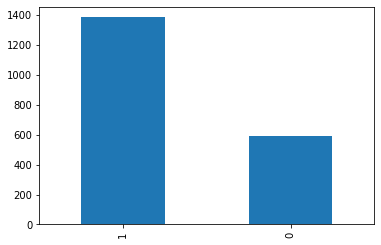

In [21]:
df['label'].value_counts().plot(kind='bar')

## ***ADABOOST MODEL***

In [22]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1) 
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)


In [23]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6677908937605397


In [24]:
confusion_matrix(y_test, y_pred)

array([[ 31, 145],
       [ 52, 365]])

In [25]:
metrics.recall_score(y_test, y_pred)

0.8752997601918465

## ***KNN Model***

In [56]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 11):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [57]:
 scores

{2: [0.7091172214182344, 0.521079258010118],
 3: [0.76410998552822, 0.6559865092748736],
 4: [0.7424023154848046, 0.6020236087689713],
 5: [0.7460202604920405, 0.6930860033726813],
 6: [0.7337192474674384, 0.6559865092748736],
 7: [0.7351664254703328, 0.6812816188870152],
 8: [0.7293777134587555, 0.6728499156829679],
 9: [0.7272069464544139, 0.6897133220910624],
 10: [0.7329956584659914, 0.6863406408094435]}

In [58]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [60]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6930860033726813


In [61]:
confusion_matrix(y_test, y_pred)

array([[ 37, 139],
       [ 43, 374]])

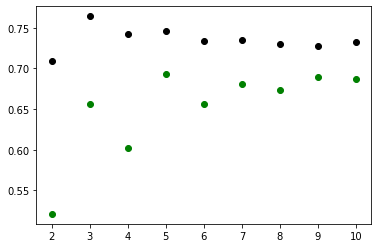

In [62]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

In [33]:
# svm = SVC(kernel="poly", degree=1, gamma="scale")

In [34]:
# svm.fit(X_train, y_train)

In [35]:
# y_pred = svm.predict(X_test)

In [36]:
# confusion_matrix(y_test, y_pred)

In [37]:
# lr = LogisticRegression()

In [38]:
# lr.fit(X_train, y_train)

In [39]:
# y_pred = lr.predict(X_test)

In [40]:
# y_pred

In [41]:
# confusion_matrix(y_test, y_pred)

In [42]:
# y_train_hat_probs = lr.predict_proba(X_test)[:,1]

In [43]:
# y_train_hat_probs

In [44]:
# nb = GaussianNB()

In [45]:
# nb.fit(X_train.toarray(), y_train)

In [46]:
# y_pred = nb.predict(X_test.toarray())

In [47]:
# y_pred

In [48]:
# confusion_matrix(y_test, y_pred)